Software is defected or not

Reading dataset

In [6]:
from warnings import filterwarnings
filterwarnings("ignore")

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("train.csv")
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [9]:
df.shape

(101763, 23)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [11]:
# checking missing values
df.isna().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

Seperate x and y 

In [25]:
x=df.drop(columns=["id","defects"])
x.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0


In [26]:
y=df[["defects"]]
y.head()

,defects
0,False
1,False
2,False
3,True
4,False


seperate cat an con data in x

In [27]:
cat=list(x.columns[x.dtypes=="objects"])
cat

[]

In [28]:
con=list(x.columns[x.dtypes!="object"])
con

['loc',
 'v(g)',
 'ev(g)',
 'iv(g)',
 'n',
 'v',
 'l',
 'd',
 'i',
 'e',
 'b',
 't',
 'lOCode',
 'lOComment',
 'lOBlank',
 'locCodeAndComment',
 'uniq_Op',
 'uniq_Opnd',
 'total_Op',
 'total_Opnd',
 'branchCount']

Create a preprocessing Pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [30]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy="mean")),
                         ("scaler",StandardScaler())])

In [33]:
x_pre=num_pipe.fit_transform(x)

In [34]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pre,y,test_size=0.2)

In [39]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=1,max_depth=1,min_samples_leaf=3,min_samples_split=5)
cls.fit(x_train,y_train)


RandomForestClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=1)

In [40]:
cls.score(x_train,y_train)

0.8022847316054539

In [41]:
cls.score(x_test,y_test)

0.7982606986685009

Hyperparameter tuning

In [59]:
params={
    "max_depth":[1,2,3,4,5,6,7],
    "min_samples_leaf":[50,100,150,200,300,500],
    "min_samples_split":[400,500,600,700,800,900],
    "criterion":["entropy","gini"]
}

In [60]:
from sklearn.model_selection import RandomizedSearchCV
rfc=RandomForestClassifier()
rgsv=RandomizedSearchCV(rfc,param_distributions=params,cv=5,scoring="f1_macro")


In [61]:
rgsv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [50, 100, 150, 200,
                                                             300, 500],
                                        'min_samples_split': [400, 500, 600,
                                                              700, 800, 900]},
                   scoring='f1_macro')

In [62]:
rgsv.best_params_

{'min_samples_split': 500,
 'min_samples_leaf': 50,
 'max_depth': 6,
 'criterion': 'entropy'}

In [63]:
rgsv.best_score_

0.6840889510577091

In [64]:
best_rfc=rgsv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=50,
                       min_samples_split=500)

In [65]:
best_rfc.score(x_train,y_train)

0.8142857142857143

In [66]:
best_rfc.score(x_test,y_test)

0.8141797278042548

Model Prediction


In [67]:
y_pred_tr=best_rfc.predict(x_train)
y_pred_ts=best_rfc.predict(x_test)

In [68]:
y_pred_tr[:5]

array([False, False, False, False, False])

In [69]:
y_pred_ts[:5]

array([False, False, False, False, False])

Create confusion matrix

In [71]:
from sklearn.metrics import *
cm=confusion_matrix(y_test,y_pred_ts)
cm

array([[14869,   906],
       [ 2876,  1702]], dtype=int64)

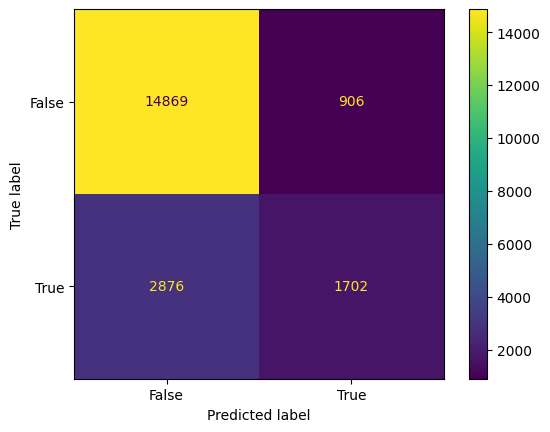

In [76]:
cmd=ConfusionMatrixDisplay(cm,display_labels=best_rfc.classes_)
cmd.plot()

Create classification report

In [77]:
print(classification_report(y_test,y_pred_ts))


              precision    recall  f1-score   support

       False       0.84      0.94      0.89     15775
        True       0.65      0.37      0.47      4578

    accuracy                           0.81     20353
   macro avg       0.75      0.66      0.68     20353
weighted avg       0.80      0.81      0.79     20353



Predict result for out of sample data

In [78]:
x_new=pd.read_csv("test.csv")
x_new.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [79]:
x_new.isna().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
dtype: int64

In [83]:
x_new.drop(columns=["id"],axis=1,inplace=True)

In [84]:
x_new_pre=num_pipe.transform(x_new)

In [85]:
pred=best_rfc.predict(x_new_pre)
pred[:5]

array([False, False,  True, False, False])

In [86]:
x_new["output"]=pred
x_new.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,output
0,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,22636.74,...,30,0,3,0,21.0,23.0,87.0,57.0,9.0,False
1,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,14482.46,...,23,0,2,0,18.0,19.0,70.0,49.0,15.0,False
2,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,116160.08,...,99,9,17,1,26.0,53.0,333.0,244.0,21.0,True
3,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,16135.47,...,45,8,10,0,15.0,26.0,88.0,60.0,13.0,False
4,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,2624.49,...,16,0,4,0,12.0,15.0,30.0,24.0,5.0,False


In [87]:
# save to csv
x_new.to_csv("result.csv",index=False)